In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
maindf = pd.read_csv('../train.csv')
maindf.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [20]:
df6171 = maindf.iloc[:, 61:71]
df6171["SalePrice"] = maindf["SalePrice"]
print(df6171.columns)
df6171.tail()

Index(['GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'SalePrice'],
      dtype='object')


,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice
1455,2,460,TA,TA,Y,0,40,0,0,0,175000
1456,2,500,TA,TA,Y,349,0,0,0,0,210000
1457,1,252,TA,TA,Y,0,60,0,0,0,266500
1458,1,240,TA,TA,Y,366,0,112,0,0,142125
1459,1,276,TA,TA,Y,736,68,0,0,0,147500


In [12]:
df6171_PavedDrive = pd.DataFrame(df6171, columns=['PavedDrive'])
df6171_PavedDrive['SalePrice'] = df6171['SalePrice'] 
df6171_f2 = df6171.groupby(['PavedDrive']).size().reset_index(name='Counts')
df6171_f2   #포장 도로 
#        Y Paved 
#        P Partial Pavement
#        N Dirt/Gravel

,PavedDrive,Counts
0,N,90
1,P,30
2,Y,1340


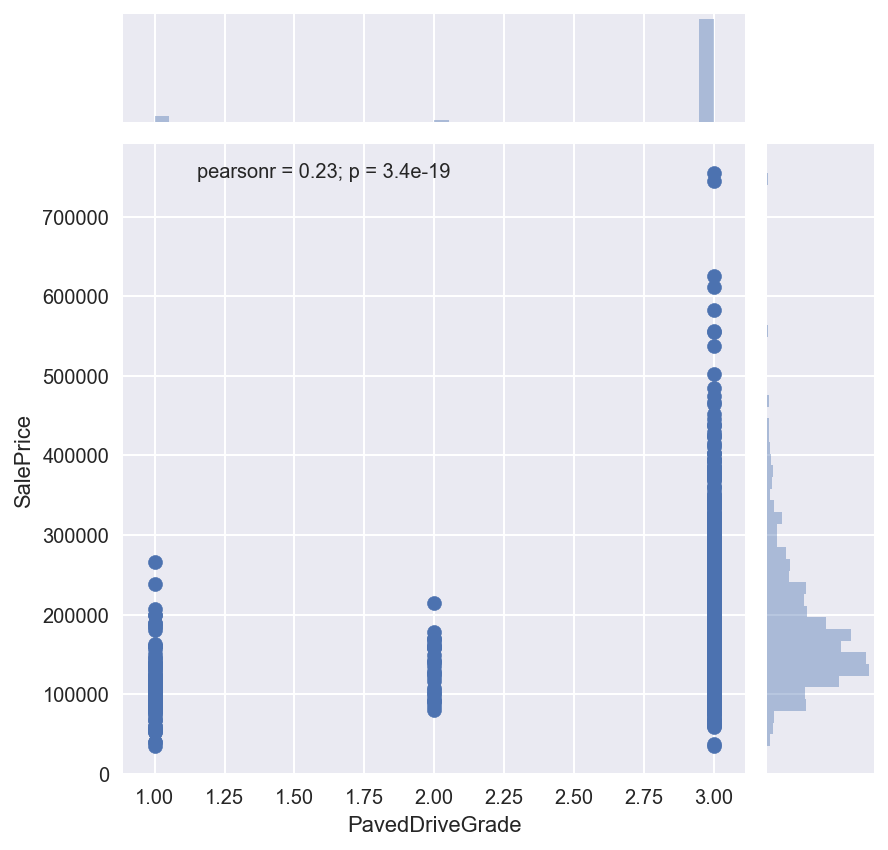

In [14]:
def PavedDrivegrade(data) :
    if data == 'Y':
        return 3
    if data == 'P':
        return 2
    if data == 'N':
        return 1
    else:
        return 0
df6171_PavedDrive['PavedDriveGrade'] = df6171_PavedDrive['PavedDrive'].apply(PavedDrivegrade)
sns.jointplot(x="PavedDriveGrade", y="SalePrice", data=df6171_PavedDrive)

In [15]:
df6171_GarageCond = pd.DataFrame(df6171, columns=['GarageCond'])
df6171_GarageCond['SalePrice'] = df6171['SalePrice'] 
df6171_f2 = df6171.groupby(['GarageCond']).size().reset_index(name='Counts')
df6171_f2   #차고 상태
#        Ex Excellent
#        Gd Good
#        TA Typical/Average
#        Fa Fair
#        Po Poor
#        NA No Garage

,GarageCond,Counts
0,Ex,2
1,Fa,35
2,Gd,9
3,Po,7
4,TA,1326


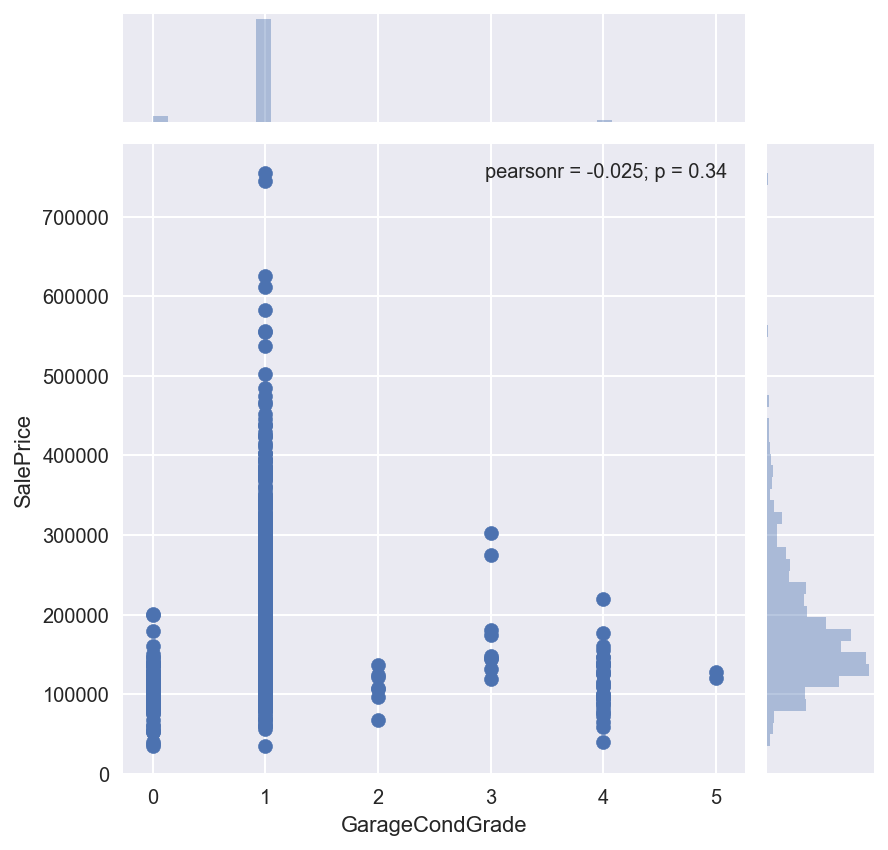

In [17]:
def GarageCondgrade(data) :
    if data == 'Ex':
        return 5
    if data == 'Fa':
        return 4
    if data == 'Gd':
        return 3
    if data == 'Po':
        return 2
    if data == 'TA':
        return 1
    else:
        return 0
df6171_GarageCond['GarageCondGrade'] = df6171_GarageCond['GarageCond'].apply(GarageCondgrade)
sns.jointplot(x="GarageCondGrade", y="SalePrice", data=df6171_GarageCond)

In [18]:
df6171_GarageQual = pd.DataFrame(df6171, columns=['GarageQual'])
df6171_GarageQual['SalePrice'] = df6171['SalePrice'] 
df6171_f2 = df6171.groupby(['GarageQual']).size().reset_index(name='Counts')
df6171_f2   #차고 질
#        Ex Excellent
#        Gd Good
#        TA Typical/Average
#        Fa Fair
#        Po Poor
#        NA No Garage

,GarageQual,Counts
0,Ex,3
1,Fa,48
2,Gd,14
3,Po,3
4,TA,1311


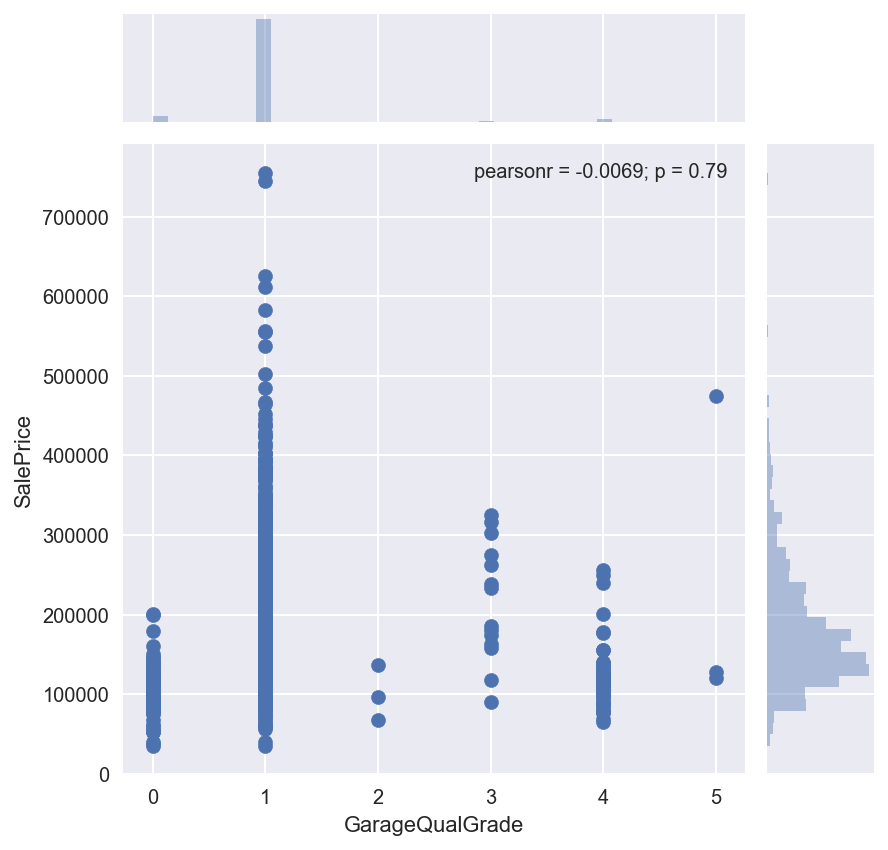

In [19]:
def GarageQualgrade(data) :
    if data == 'Ex':
        return 5
    if data == 'Fa':
        return 4
    if data == 'Gd':
        return 3
    if data == 'Po':
        return 2
    if data == 'TA':
        return 1
    else:
        return 0
df6171_GarageQual['GarageQualGrade'] = df6171_GarageQual['GarageQual'].apply(GarageQualgrade)
sns.jointplot(x="GarageQualGrade", y="SalePrice", data=df6171_GarageQual)